In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib .pyplot as plt
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
#omporting dataset 
df = pd.read_csv('2sentiments.csv')
df.head()


,CLASS,SENTENCES,SNO
0,P,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,1
1,N,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,2
2,P,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,3
3,N,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے هو...,4
4,N,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",5


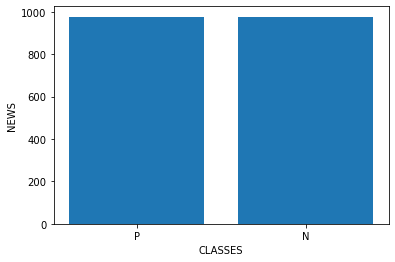

In [3]:
##### BAR PLOT
from matplotlib import pyplot as plt
import pandas as pd

plt.bar(df.CLASS,df.SNO)
plt.ylabel("NEWS")
plt.xlabel("CLASSES")
plt.show()

In [4]:
# checking anything is null
df.isnull().sum()

CLASS        0
SENTENCES    1
SNO          0
dtype: int64

In [5]:
# putthing space in the null value
df['SENTENCES'] = df['SENTENCES'].fillna(' ')
df

,CLASS,SENTENCES,SNO
0,P,میں نے ایٹم بم بنایا ھے ۔۔۔۔او بھائی ایٹم بمب ...,1
1,N,چندے سے انقلاب اور عمران خان وزیر اعظم نہیں بن...,2
2,P,ابھی تک اسکی لہریں کبھی کبھی آ جاتی ہیں یار :أْ,3
3,N,گندی زبان اور گٹر جیسے دماغ والے جاهل جیالے هو...,4
4,N,"قاتل بھی تم مقتول بھی تم,ظالم بھی ہم اور مظلوم...",5
...,...,...,...
972,P,چچا غالب کی روح سے معذرت کے ساتھہم نے مانا کہ ...,973
973,P,واہ جناب واہ! اچھی رہی۔ جناب خود کو فرشتہ سمجو...,974
974,P,اسلام آباد :پی اے ٹی کا دھرنا ختم، صفائی کے کا...,975
975,P,دنیا نے کس کا راہ وفا میں دیا ہے ساتھتم بھی چل...,976


In [6]:
# checking anything is null
df.isnull().sum()

CLASS        0
SENTENCES    0
SNO          0
dtype: int64

In [7]:
# # Associate Category names with numerical index and save it in new column category_id
category_id=df['category_id'] = df['CLASS'].factorize()[0]

# category_id = review_df.CLASS.factorize()
# category_id
# View first 10 entries of category_id, as a sanity check
df['category_id'][0:10]
sentiment_label = df.CLASS.factorize()
a = np.array(sentiment_label)

# print()
# # np.array(sentiment_label)
print(type(a))

<class 'numpy.ndarray'>


In [8]:
category_id_df = df[['CLASS', 'category_id']].drop_duplicates().sort_values('category_id')
category_id_df

,CLASS,category_id
0,P,0
1,N,1


In [9]:
df.sample(5, random_state=0)

,CLASS,SENTENCES,SNO,category_id
966,N,انشاء جی اٹھو اب کوچ کرو، اس شہر ميں جی کو لگا...,967,1
879,P,نہ ہی پوچھیں تو اچھا ہے,880,0
436,N,دیکھیں یہ بات بالکل درست ھے ۔ سڑکیں بلاک کرنا ...,437,1
970,P,گھر سے استنجاء اور وضو کر کے مسجد آنا:احادیث م...,971,0
261,P,میرا کپتان نہی بولا تو ہمیں بھی AT کے دوستو کو...,262,0


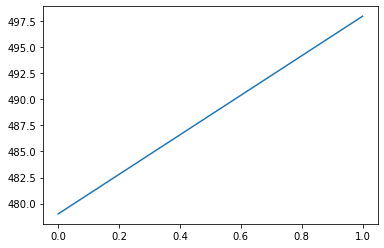

In [10]:
plt.plot(df['category_id'].value_counts())

In [11]:
df['category_id'].value_counts()

1    498
0    479
Name: category_id, dtype: int64

In [12]:
x =df['SENTENCES']
y = df['category_id']

In [13]:
preprocessing = []
for i in range(len(x)):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '',x[i], flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text)
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    preprocessing.append(text)
#     print(preprocessing[0:10])
    
# Now, before proceeding ahead in python sentiment analysis project let’s tokenize all the words in the text with the help of Tokenizer. In tokenization, we break down all the words/sentences of a text into small parts called tokens.

from tensorflow.keras.preprocessing.text import Tokenizer
# from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(preprocessing)
print(tokenizer)
# The fit_on_texts() method creates an association between the words and the assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.
vocab_size = len(tokenizer.word_index) + 1    

# Now, replace the words with their assigned numbers using the text_to_sequence() method.

encoded_docs = tokenizer.texts_to_sequences(preprocessing)
print(encoded_docs)

[[2, 10, 722, 723, 266, 21, 1860, 180, 722, 1861, 1862, 1863, 196, 724, 1053, 2, 13, 1864, 723, 1865, 3, 1866], [73, 4, 36, 8, 41, 25, 91, 103, 13, 76, 238], [197, 92, 518, 1054, 132, 132, 104, 519, 14, 520, 1867], [1868, 362, 8, 1869, 316, 521, 65, 1055, 1056, 181, 1870, 1871, 181, 8, 1055, 1872, 181, 317, 522, 217, 9], [1873, 15, 111, 1874, 15, 111, 1875, 15, 47, 8, 1876, 15, 1877], [1878, 1879, 93, 1880, 145, 160, 1057, 1881, 1882, 430, 93, 1883, 267, 1884, 160], [28, 1058, 1885, 1886, 21, 1887, 16, 51, 1059, 1888, 111, 169, 431, 21, 1889, 28, 1890, 181, 1059, 1891, 21, 239], [1060, 432, 1, 1061, 1, 54, 1062, 1063, 1064, 1892], [91, 103, 3, 363, 1065, 1893, 1066, 6, 1067], [1894, 58, 433, 182, 268, 4, 66, 523, 119, 16, 122, 32, 269, 47, 10, 1068, 524, 434, 1069, 524, 10, 170, 1070, 22, 433, 10, 1895, 66, 525, 170, 7, 1896, 59], [1071, 725, 18, 19, 1897, 1898, 18, 19, 1899, 1072, 1900, 726, 132, 1073, 2, 12, 727, 23, 55], [44, 240, 1, 435, 133, 526, 1901, 728, 37, 1074, 1902, 52, 5, 

In [14]:
# Each of the sentences in the dataset is not of equal length. Use padding to pad the sentences to have equal length.

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)
print(padded_sequence)

[[   0    0    0 ... 1865    3 1866]
 [   0    0    0 ...   13   76  238]
 [   0    0    0 ...   14  520 1867]
 ...
 [   0    0    0 ...  637  638  639]
 [   0    0    0 ...   92  680  720]
 [   0    0    0 ...   25 1794    5]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
# vocab_size = 13234
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           174624    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 191,275
Trainable params: 191,275
Non-trainable params: 0
__________________________________________________

In [16]:
# Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

history = model.fit(padded_sequence,a[0],validation_split=0.2, epochs=10, batch_size=32)
# The python sentiment analysis model obtained 96% accuracy on the training set and 94.33% accuracy on the test set

Epoch 1/10
25/25 [==============================] - 7s 153ms/step - loss: 0.6936 - accuracy: 0.4545 - val_loss: 0.6929 - val_accuracy: 0.4898
Epoch 2/10
25/25 [==============================] - 3s 127ms/step - loss: 0.6901 - accuracy: 0.5275 - val_loss: 0.6925 - val_accuracy: 0.4847
Epoch 3/10
25/25 [==============================] - 3s 127ms/step - loss: 0.6779 - accuracy: 0.6056 - val_loss: 0.6859 - val_accuracy: 0.5204
Epoch 4/10
25/25 [==============================] - 5s 185ms/step - loss: 0.6041 - accuracy: 0.7388 - val_loss: 0.6929 - val_accuracy: 0.5816
Epoch 5/10
25/25 [==============================] - 5s 187ms/step - loss: 0.4502 - accuracy: 0.8271 - val_loss: 0.7017 - val_accuracy: 0.5918
Epoch 6/10
25/25 [==============================] - 3s 120ms/step - loss: 0.3025 - accuracy: 0.9091 - val_loss: 0.8576 - val_accuracy: 0.5816
Epoch 7/10
25/25 [==============================] - 5s 179ms/step - loss: 0.1888 - accuracy: 0.9539 - val_loss: 0.8679 - val_accuracy: 0.5867
Epoch 

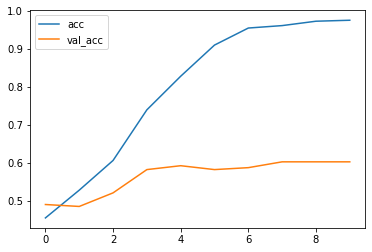

<Figure size 432x288 with 0 Axes>

In [17]:
# Let’s plot these metrics using the matplotlib.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

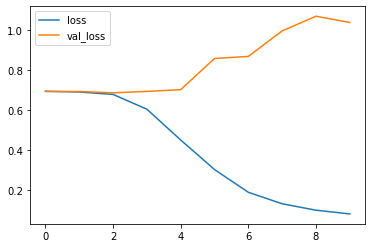

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

# Let’s execute sentiment analysis model

In [19]:
# Define a function that takes a text as input and outputs its prediction label.

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے "
predict_sentiment(test_sentence1)

# test_sentence2 = "This is the worst flight experience of my life!"
# predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 276ms/step
Predicted label:  N
